<a href="https://colab.research.google.com/github/vkp250502/charge_comparision_between_ecommerce_and_corier_company/blob/main/Cointab_Data_Analyst_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cointab Software Private Limited Data**

# Data Analyst Challenge

## **Business Scenario**



You are a data analyst and have a large ecommerce company in India (let’s call it X) as a client. X gets a few thousand orders via their website on a daily basis and they have to deliver them as fast as they can. For delivering the goods ordered by the customers, X has tied up with multiple courier companies in India who charge them some amount per delivery.


## **The charges are dependent upon two factors:**



● Weight of the product


● Distance between the warehouse (pickup location) and customer’s delivery address (destination location)



On an average, the delivery charges are Rs. 100 per shipment. So if X ships 1,00,000 orders per month, they have to pay approximately Rs. 1 crore to the courier companies on a monthly basis as charges.





**As the amount that X has to pay to the courier companies is very high, they want to verify if the charges levied by their partners per Order are correct.**

**Input Data**



Left Hand Side (LHS) Data (X’s internal data spread across three reports)

 ● Website order report which will list Order IDs and various products (SKUs) part of each order. Order ID is common identifier between X’s order report and courier company invoice


● SKU master with gross weight of each product. This should be used to calculate total weight of each order and during analysis compare against one reported by courier company in their CSV invoice per Order ID. The courier company calculates weight in slabs of 0.5 KG multiples, so first you have to figure out the total weight of the shipment and then figure out applicable weight slabs.
For example:


Warehouse pincode to All India pincode mapping (this should be used to figure out delivery zone (a/b/c/d/e) and during analysis compare against one reported by courier company in their CSV invoice per Order ID


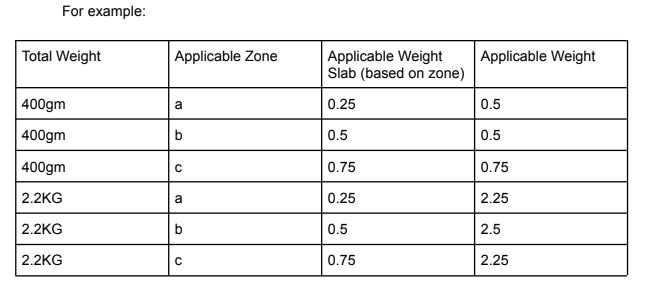


**RHS Data** (courier company invoice in CSV file)



Invoice in CSV file mentioning AWB Number (courier company’s own internal ID), Order
ID (company X’s order ID), weight of shipment, warehouse pickup pincode, customer
delivery pincode, zone of delivery, charges per shipment, type of shipment


● Courier charges rate card at weight slab and pincode level. If the invoice mentions
“Forward charges” then only forward charges (“fwd”) should be applicable as per zone
and fixed & additional weights based on weight slabs. If the invoice mentions “Forward
and rto charges” then forward charges (“fwd”) and RTO charges (“rto”) should be
applicable as per zone and fixed & additional weights based on weight slabs.


● For the first slab of that zone, “fixed” rate as per the slab is applicable. For each
additional slab, “additional” weight in the same proportion is applicable. Total charges will
be “fixed” + “total additional” if any. For example: weight 2.2KG, Zone C. So for Zone C
the slab length = 0.75KG. So the total applicable weight = 2.25KG. For the first 0.75 KG
the charge is “fwd”, and for each 0.75 after the first, charges will be additional charges.


● Once this is done, then you need to calculate the COD charges. For this case, if the
order is Prepaid then COD charge is 0 and if the order is COD then we need to check
the amount of the order
If the order amount is less than equal to 300 then COD charge is 15
Else the COD charge is 5% of the Order Amount


● Total Charges = Total forward charge + Total RTO charge + COD charge.


**Output Data 1**

Create a resultant CSV/Excel file with the following columns:

* Order ID
* AWB Number
* Total weight as per X (KG)
* Weight slab as per X (KG)
* Total weight as per Courier Company (KG)
* Weight slab charged by Courier Company (KG)
* Delivery Zone as per X
* Delivery Zone charged by Courier Company
* Expected Charge as per X (Rs.)
* Charges Billed by Courier Company (Rs.)
* Difference Between Expected Charges and Billed Charges (Rs.)








##**Import important librarys**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

##**Import  excel files for datasets**








In [ ]:
order_report = pd.read_excel('/content/Company X - Order Report.xlsx')

In [ ]:
df = order_report[['ExternOrderNo','Payment Mode']]

In [ ]:
order_report

,ExternOrderNo,SKU,Order Qty,Payment Mode,Item Price(Per Qty.)
0,2001827036,8904223818706,1,COD,233
1,2001827036,8904223819093,1,COD,233
2,2001827036,8904223819109,1,COD,233
3,2001827036,8904223818430,1,COD,470
4,2001827036,8904223819277,1,COD,233
...,...,...,...,...,...
395,2001806229,8904223818942,1,COD,286
396,2001806229,8904223818850,1,COD,563
397,2001806226,8904223818850,2,COD,1125
398,2001806210,8904223816214,1,COD,402


In [ ]:
sku_master = pd.read_excel('/content/Company X - SKU Master.xlsx')
sku_master.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [ ]:
df_pincode_zone = pd.read_excel('/content/Company X - Pincode Zones.xlsx')

In [ ]:
df_pincode_zone

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d
...,...,...,...
119,121003,325207,b
120,121003,303702,b
121,121003,313301,b
122,121003,173212,e


In [ ]:
df_invoice = pd.read_excel('/content/Courier Company - Invoice.xlsx')

In [ ]:
df_invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,140.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,101.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [ ]:
df_rates = pd.read_excel('/content/Courier Company - Rates.xlsx')

In [ ]:
df_rates

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.25,29.5,23.6,13.6,23.6
1,B,0.50,33.0,28.3,20.5,28.3
2,C,0.75,40.1,38.9,31.9,38.9
3,D,1.25,45.4,44.8,41.3,44.8
4,E,1.50,56.6,55.5,50.7,55.5


#**Find totel weight in (kg) for each order number**

**Merging two datframes sku_master and order_report on the basis of SKU column after then applying  group by on the basis of order number**

In [ ]:
temp_df  = sku_master.merge(order_report,how = 'inner',on = 'SKU')
temp_df['totl_weight (Kg)'] = (temp_df['Weight (g)']*temp_df['Order Qty'])/1000
temp_df['totel_item_price'] = temp_df['Order Qty'] *temp_df['Item Price(Per Qty.)']
temp_df.drop_duplicates()

temp_df = temp_df.groupby('ExternOrderNo',as_index = False ).sum('totl_weight (Kg),totel_item_price')[['ExternOrderNo','totl_weight (Kg)','totel_item_price']]

In [ ]:
 temp_df=temp_df.merge(df).drop_duplicates()

In [ ]:
temp_df

,ExternOrderNo,totl_weight (Kg),totel_item_price,Payment Mode
0,2001806210,0.220,1324,COD
2,2001806226,0.480,2250,COD
3,2001806229,0.500,1082,COD
6,2001806232,1.302,10970,COD
8,2001806233,0.245,1486,Prepaid
...,...,...,...,...
380,2001821995,0.477,484,Prepaid
382,2001822466,1.376,64922,COD
384,2001823564,0.672,9606,Prepaid
387,2001825261,1.557,33388,Prepaid


#**merging df_invoice with temp_df and concate with df_pincode_zone**

In [ ]:
temp_invoice = df_invoice.merge(temp_df,how = 'inner',left_on = 'Order ID',right_on = 'ExternOrderNo')
final_df= pd.concat([temp_invoice,df_pincode_zone],axis = 1)

In [ ]:
final_df.columns.values[14] = 'Zone_by_company'
final_df.head(10)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),ExternOrderNo,totl_weight (Kg),totel_item_price,Payment Mode,Warehouse Pincode,Customer Pincode,Zone_by_company
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,140.0,2001806232,1.302,10970,COD,121003,507101,d
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,101.2,2001806273,0.615,1684,COD,121003,486886,d
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2001806408,2.265,63537,Prepaid,121003,532484,d
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,2001806458,0.700,1491,Prepaid,121003,143001,b
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,2001807012,0.240,603,Prepaid,121003,515591,d
5,1091117229555,2001806686,0.15,121003,326502,d,Forward charges,45.4,2001806686,0.240,603,COD,121003,326502,d
6,1091117229776,2001806885,1.00,121003,208019,b,Forward charges,61.3,2001806885,0.840,7680,COD,121003,208019,b
7,1091117323112,2001807058,1.15,121003,140301,b,Forward charges,89.6,2001807058,1.168,2669,Prepaid,121003,140301,b
8,1091117323812,2001807186,0.50,121003,396001,d,Forward charges,45.4,2001807186,0.500,1082,Prepaid,121003,396001,d
9,1091117324206,2001807290,0.50,121003,711106,d,Forward charges,45.4,2001807290,0.500,1082,Prepaid,121003,711106,d


In [ ]:
np.ceil(0.515/0.5)*0.5/0.5-1

1.0

#**Calculate the excpeted charges by the company X**

In [ ]:
# weight slab  calculate by courier company
def slab_calculate():
  slab = []
  for i in final_df.index:
    d = final_df.iloc[i]
    if d['Zone'] == 'd':
     slab.append(np.ceil(d['Charged Weight']/1.25)*1.25)
    elif d['Zone'] == 'a':
      slab.append(np.ceil(d['Charged Weight']/.25)*.25)
    elif d['Zone'] == 'b':
      slab.append(np.ceil(d['Charged Weight']/.50)*.50)
    elif d['Zone'] == 'c':
      slab.append(np.ceil(d['Charged Weight']/.75)*.75)
    elif d['Zone'] == 'e':
      slab.append(np.ceil(d['Charged Weight']/1.00)*1.00)
  return slab


final_df.insert(loc = 3,
          column = 'weight_slab',
          value = slab_calculate())


In [ ]:
# weight slab calculate by company x

def slab_calculater_X():
  slab = []
  for i in final_df.index:
    d = final_df.iloc[i]
    if d['Zone_by_company'] == 'd':
      slab.append(np.ceil(d['totl_weight (Kg)']/1.25)*1.25)
    elif d['Zone_by_company'] == 'a':
      slab.append(np.ceil(d['totl_weight (Kg)']/.25)*.25)
    elif d['Zone_by_company'] == 'b':
      slab.append(np.ceil(d['totl_weight (Kg)']/.50)*.50)
    elif d['Zone_by_company'] == 'c':
      slab.append(np.ceil(d['totl_weight (Kg)']/.75)*.75)
    elif d['Zone_by_company'] == 'e':
      slab.append(np.ceil(d['totl_weight (Kg)']/1.00)*1.00)
  return slab

final_df.insert(loc = 11,
          column = 'weight_slab_by_X',
          value = slab_calculater_X())

In [ ]:
final_df

,AWB Code,Order ID,Charged Weight,weight_slab,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),ExternOrderNo,totl_weight (Kg),weight_slab_by_X,totel_item_price,Payment Mode,Warehouse Pincode,Customer Pincode,Zone_by_company
0,1091117222124,2001806232,1.30,2.50,121003,507101,d,Forward charges,140.0,2001806232,1.302,2.50,10970,COD,121003,507101,d
1,1091117222194,2001806273,1.00,1.25,121003,486886,d,Forward charges,101.2,2001806273,0.615,1.25,1684,COD,121003,486886,d
2,1091117222931,2001806408,2.50,2.50,121003,532484,d,Forward charges,224.6,2001806408,2.265,2.50,63537,Prepaid,121003,532484,d
3,1091117223244,2001806458,1.00,1.00,121003,143001,b,Forward charges,61.3,2001806458,0.700,1.00,1491,Prepaid,121003,143001,b
4,1091117229345,2001807012,0.15,1.25,121003,515591,d,Forward charges,45.4,2001807012,0.240,1.25,603,Prepaid,121003,515591,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,1.25,121003,325207,d,Forward charges,95.2,2001812941,0.500,0.50,1082,COD,121003,325207,b
120,1091117614452,2001809383,0.50,1.25,121003,303702,d,Forward and RTO charges,86.7,2001809383,0.607,1.00,1399,Prepaid,121003,303702,b
121,1091120922803,2001820978,0.50,1.25,121003,313301,d,Forward charges,45.4,2001820978,0.515,1.00,1119,Prepaid,121003,313301,b
122,1091121844806,2001811475,0.50,0.50,121003,173212,b,Forward charges,47.0,2001811475,0.689,1.00,2010,COD,121003,173212,e


In [ ]:
charge = []
for i in final_df.index:
  d =  final_df.iloc[i]
  if d['Zone_by_company'] =='d':
    if d['Type of Shipment'] == 'Forward charges':
        fixed_charge = 45.4
        additional_charge = 44.8*(d['weight_slab_by_X']/1.25-1)
        totel_charge = fixed_charge+additional_charge
        charge.append(totel_charge)
    elif d['Type of Shipment'] == 'Forward and RTO charges':
        fixed_charge = 45.4+41.3
        additional_charge = 2*44.8*(d['weight_slab_by_X']/1.25-1)
        totel_charge= fixed_charge+additional_charge
        charge.append(totel_charge)
  elif d['Zone_by_company'] =='b':
    if d['Type of Shipment'] == 'Forward charges':
        fixed_charge = 33
        additional_charge = 28.3*(d['weight_slab_by_X']/0.5-1)
        totel_charge = fixed_charge+additional_charge
        charge.append(totel_charge)
    elif d['Type of Shipment'] == 'Forward and RTO charges':
        fixed_charge = 33+20.5
        additional_charge = 2*28.3*(d['weight_slab_by_X']/0.5-1)
        totel_charge= fixed_charge+additional_charge
        charge.append(totel_charge)

  elif d['Zone_by_company'] =='e':
    if d['Type of Shipment'] == 'Forward charges':
        fixed_charge = 56.6
        additional_charge = 55.5*(d['weight_slab_by_X']-1)
        totel_charge = fixed_charge+additional_charge
        charge.append(totel_charge)
    elif d['Type of Shipment'] == 'Forward and RTO charges':
        fixed_charge = 56.6+50.5
        additional_charge = 2*55.5*(d['weight_slab_by_X']-1)
        totel_charge= fixed_charge+additional_charge
        charge.append(totel_charge)



In [ ]:
#calculate COD Charges
def cod():
  cod_charge = []
  for i in final_df.index:
    d = final_df.iloc[i]
    if d['Payment Mode'] == 'Prepaid':
      cod_charge.append(0)
    elif d['Payment Mode'] == 'COD':
      if d['totel_item_price'] > 300:
        charge = d['totel_item_price']*0.05
        cod_charge.append(charge)
      elif d['totel_item_price'] < 300:
        cod_charge.append(15)
  return cod_charge



In [ ]:
final_df['cod_charge'] = cod()
final_df['cod_charge'] = round(final_df['cod_charge'],2)

In [ ]:
final_df.head()

,AWB Code,Order ID,Charged Weight,weight_slab,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),ExternOrderNo,totl_weight (Kg),weight_slab_by_X,totel_item_price,Payment Mode,Warehouse Pincode,Customer Pincode,Zone_by_company,cod_charge
0,1091117222124,2001806232,1.30,2.50,121003,507101,d,Forward charges,140.0,2001806232,1.302,2.50,10970,COD,121003,507101,d,548.5
1,1091117222194,2001806273,1.00,1.25,121003,486886,d,Forward charges,101.2,2001806273,0.615,1.25,1684,COD,121003,486886,d,84.2
2,1091117222931,2001806408,2.50,2.50,121003,532484,d,Forward charges,224.6,2001806408,2.265,2.50,63537,Prepaid,121003,532484,d,0.0
3,1091117223244,2001806458,1.00,1.00,121003,143001,b,Forward charges,61.3,2001806458,0.700,1.00,1491,Prepaid,121003,143001,b,0.0
4,1091117229345,2001807012,0.15,1.25,121003,515591,d,Forward charges,45.4,2001807012,0.240,1.25,603,Prepaid,121003,515591,d,0.0


In [ ]:
charge_df  = pd.DataFrame(charge,columns = ['charges'])
final_df = pd.concat([final_df,round(charge_df,2)],axis = 1)

**Calculate totel charge**

In [ ]:
final_df['totel_charges'] = final_df['cod_charge'] + final_df['charges']

In [ ]:
final_df['difference b/w charges'] =round((final_df['totel_charges'] -final_df['Billing Amount (Rs.)']) ,2)

In [ ]:
final_df.sample(5)

,AWB Code,Order ID,Charged Weight,weight_slab,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),ExternOrderNo,...,weight_slab_by_X,totel_item_price,Payment Mode,Warehouse Pincode,Customer Pincode,Zone_by_company,cod_charge,charges,totel_charges,difference b/w charges
102,1091117436652,2001808585,0.72,1.00,121003,175101,b,Forward charges,61.3,2001808585,...,1.00,1082,COD,121003,175101,e,54.1,56.6,110.7,49.4
42,1091117224902,2001806567,1.16,1.25,121003,370201,d,Forward charges,141.0,2001806567,...,1.25,3996,COD,121003,370201,d,199.8,45.4,245.2,104.2
118,1091118442390,2001812195,0.67,1.25,121003,302012,d,Forward charges,90.2,2001812195,...,0.50,1082,Prepaid,121003,302012,b,0.0,33.0,33.0,-57.2
41,1091117224611,2001806547,1.00,1.00,121003,283102,b,Forward charges,61.3,2001806547,...,0.50,233,COD,121003,283102,b,15.0,33.0,48.0,-13.3
32,1091121482593,2001809917,0.60,1.25,121003,831006,d,Forward and RTO charges,179.8,2001809917,...,1.25,1844,COD,121003,831006,d,92.2,86.7,178.9,-0.9


##**Exctract desire column from final_df**

In [ ]:
output_data_1_df = final_df[['Order ID','AWB Code','totl_weight (Kg)','weight_slab_by_X','Charged Weight','weight_slab','Zone_by_company','Zone','totel_charges','Billing Amount (Rs.)','difference b/w charges']]

In [ ]:
output_data_1_df=output_data_1_df.rename(columns = {'totl_weight (Kg)e':'totel_weight (Kg)',
                                                    'totel_charges':' Expected Charge as per X (Rs.)',
                                                    'Zone':'zone_courier_company',
                                                    'totel_charges':'Expected Charges'})

##**Find the count and sum of correctly_charge,overcharge,undercharge**

In [ ]:
correctly_charge = []
overcharged = []
undercharged =  []
for i in final_df.index:
  d = final_df.iloc[i]
  if d['difference b/w charges'] == 0:
    correctly_charge.append(d['totel_charges'])
  elif d['difference b/w charges'] <0:
    overcharged.append(d['difference b/w charges'])
  elif d['difference b/w charges'] >0:
    undercharged.append(d['difference b/w charges'])

[61.3, 45.4, 89.6, 45.4, 45.4, 61.3, 89.6, 45.4, 33.0, 61.3]

In [ ]:
output_data_1_df

,Order ID,AWB Code,totl_weight (Kg),weight_slab_by_X,Charged Weight,weight_slab,Zone_by_company,zone_courier_company,Expected Charges,Billing Amount (Rs.),difference b/w charges
0,2001806232,1091117222124,1.302,2.50,1.30,2.50,d,d,638.7,140.0,498.7
1,2001806273,1091117222194,0.615,1.25,1.00,1.25,d,d,129.6,101.2,28.4
2,2001806408,1091117222931,2.265,2.50,2.50,2.50,d,d,90.2,224.6,-134.4
3,2001806458,1091117223244,0.700,1.00,1.00,1.00,b,b,61.3,61.3,0.0
4,2001807012,1091117229345,0.240,1.25,0.15,1.25,d,d,45.4,45.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
119,2001812941,1091118551656,0.500,0.50,0.73,1.25,b,d,87.1,95.2,-8.1
120,2001809383,1091117614452,0.607,1.00,0.50,1.25,b,d,110.1,86.7,23.4
121,2001820978,1091120922803,0.515,1.00,0.50,1.25,b,d,61.3,45.4,15.9
122,2001811475,1091121844806,0.689,1.00,0.50,0.50,e,b,157.1,47.0,110.1


##**Export dataset in  to Excel sheet**

In [ ]:
output_data_1_df.to_excel('output_1.xlsx')

In [ ]:
output_data_1_df.head(25)

,Order ID,AWB Code,totl_weight (Kg),weight_slab_by_X,Charged Weight,weight_slab,Zone_by_company,zone_courier_company,Expected Charges,Billing Amount (Rs.),difference b/w charges
0,2001806232,1091117222124,1.302,2.50,1.30,2.50,d,d,638.70,140.0,498.70
1,2001806273,1091117222194,0.615,1.25,1.00,1.25,d,d,129.60,101.2,28.40
2,2001806408,1091117222931,2.265,2.50,2.50,2.50,d,d,90.20,224.6,-134.40
3,2001806458,1091117223244,0.700,1.00,1.00,1.00,b,b,61.30,61.3,0.00
4,2001807012,1091117229345,0.240,1.25,0.15,1.25,d,d,45.40,45.4,0.00
5,2001806686,1091117229555,0.240,1.25,0.15,1.25,d,d,75.55,45.4,30.15
6,2001806885,1091117229776,0.840,1.00,1.00,1.00,b,b,445.30,61.3,384.00
7,2001807058,1091117323112,1.168,1.50,1.15,1.50,b,b,89.60,89.6,0.00
8,2001807186,1091117323812,0.500,1.25,0.50,1.25,d,d,45.40,45.4,0.00
9,2001807290,1091117324206,0.500,1.25,0.50,1.25,d,d,45.40,45.4,0.00


#**Final Result**

In [ ]:
print(f"Total orders where X has been correctly charged  is {len(correctly_charge)} and correctly charged amount is {round(sum(correctly_charge),2)}")

Total orders where X has been correctly charged  is 10 and correctly charged amount is 577.7


In [ ]:
print(f'Total Orders where X has been overcharged is  {len(overcharged)} and overcharged amount is {round(sum(overcharged),2)}')

Total Orders where X has been overcharged is  68 and overcharged amount is -4154.45


In [ ]:
print(f'Total Orders where X has been undercharged is {len(undercharged)}  and undercharged amount is {round(sum(undercharged),2)}')

Total Orders where X has been undercharged is 46  and undercharged amount is 10932.9


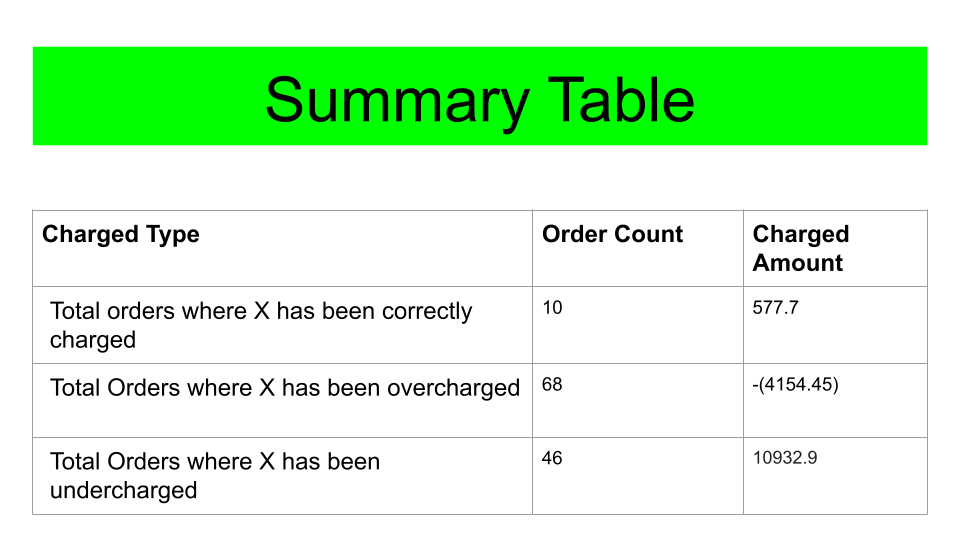